In [ ]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install joblib

In [ ]:
pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Change the name of the train file and test file
df = pd.read_csv('SMOTE Train Part 2 MESocSentiment.csv')
df.head()

df2 = pd.read_csv('Test Part 2 Ground Truth.csv')
df2.head()

df2.drop(['Sentiment (MESocSentiment)'], axis = 1, inplace = True)
df2.head()

,Tweets,Sentiment (Manual)
0,new post pocketimes youtube abang,NEUTRAL
1,merdeka motherfuckers,NEGATIVE
2,waiting bunga api kalau ada hahahah,NEUTRAL
3,random pics places kl took using ig filters se...,POSITIVE
4,kim pangon malaysia try new players chiangmai,NEUTRAL


In [ ]:
df.head()

,Tweets,Sentiment (All)
0,dost karde bamszlk g kutluyoruz happy malaysia...,POSITIVE
1,malaysia face vietnam group b aff cup,NEUTRAL
2,whitebrowed crake poliolimnas cinereus baram w...,NEUTRAL
3,burmese pool taiping perak malaysia vivo x pro...,NEUTRAL
4,no comments penang malayasia,NEUTRAL


In [ ]:
df2.head()

,Tweets,Sentiment (Manual)
0,new post pocketimes youtube abang,NEUTRAL
1,merdeka motherfuckers,NEGATIVE
2,waiting bunga api kalau ada hahahah,NEUTRAL
3,random pics places kl took using ig filters se...,POSITIVE
4,kim pangon malaysia try new players chiangmai,NEUTRAL


In [ ]:
X_train = df['Tweets']
y_train = df['Sentiment (All)']

X_test = df2['Tweets']
y_test = df2['Sentiment (Manual)']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect= TfidfVectorizer(max_features = None)
tfidf_vect.fit(df['Tweets'])
X_train_tfidf_vect = tfidf_vect.transform(df['Tweets'])
X_test_tfidf_vect = tfidf_vect.transform(df2['Tweets'])

In [ ]:
tfidf_vect

TfidfVectorizer()

In [ ]:
print(X_train_tfidf_vect)

  (0, 1018)	0.37461424850678915
  (0, 3029)	0.37461424850678915
  (0, 3598)	0.37461424850678915
  (0, 5259)	0.1641914070737732
  (0, 5892)	0.2049314591133541
  (0, 6585)	0.37461424850678915
  (0, 7171)	0.37461424850678915
  (0, 7913)	0.23252544876531298
  (0, 8457)	0.18697909904440602
  (0, 12006)	0.37461424850678915
  (1, 186)	0.46177845912657695
  (1, 2879)	0.39051351239191917
  (1, 4178)	0.43861958399552986
  (1, 5060)	0.38800470663714703
  (1, 7876)	0.2084168319671432
  (1, 14583)	0.49788300196110336
  (2, 988)	0.25833836178779873
  (2, 1066)	0.3580847893775331
  (2, 2354)	0.3580847893775331
  (2, 2783)	0.34296083729104454
  (2, 5698)	0.2882660901288355
  (2, 10202)	0.25027318461942444
  (2, 10388)	0.3580847893775331
  (2, 11738)	0.228233644951486
  (2, 14847)	0.3239069110618941
  :	:
  (10861, 11684)	0.2022098074801047
  (10861, 12904)	0.21840695809098
  (10861, 13539)	0.1734646351858825
  (10861, 13540)	0.21840695809098
  (10861, 13551)	0.16749225134627088
  (10861, 14586)	0.1527

In [ ]:
print(X_test_tfidf_vect)

  (0, 16)	0.4164015525405518
  (0, 9136)	0.29710568640296675
  (0, 10370)	0.6141448124872567
  (0, 10449)	0.44764294433262475
  (0, 15216)	0.4009736921956988
  (1, 8457)	0.41273355335247397
  (1, 8771)	0.9108518067924334
  (2, 108)	0.40158635586337
  (2, 590)	0.4443594414353197
  (2, 1857)	0.45662791109864875
  (2, 5171)	0.5672242243150554
  (2, 6527)	0.33319771269853843
  (3, 417)	0.3022474938708352
  (3, 5780)	0.27211866017626646
  (3, 6963)	0.24485991207013813
  (3, 7876)	0.14585823011753002
  (3, 8457)	0.1913883508984041
  (3, 10231)	0.4409961427110339
  (3, 10300)	0.3136322937489061
  (3, 10956)	0.38344822288255814
  (3, 11983)	0.1994836381297208
  (3, 13936)	0.38344822288255814
  (3, 14451)	0.300059613789967
  (4, 2266)	0.5313009493620704
  (4, 6913)	0.374501041767118
  :	:
  (1997, 4073)	0.2563312841757465
  (1997, 4323)	0.27895437144091495
  (1997, 4835)	0.25464372209069974
  (1997, 5520)	0.2563312841757465
  (1997, 6349)	0.3531745547669218
  (1997, 7030)	0.29353529293529756
  

In [ ]:
print(X_train_tfidf_vect.shape)
print(X_test_tfidf_vect.shape)

(10863, 15321)
(2000, 15321)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

MNB= MultinomialNB()
MNB.fit(X_train_tfidf_vect, y_train)

MultinomialNB()

In [ ]:
#To save the Multinomial Naive Bayes model
import joblib

# Using joblib
joblib.dump(MNB, 'naive_bayes_model_joblib.pkl')

['naive_bayes_model_joblib.pkl']

In [ ]:
from sklearn.metrics import accuracy_score

predictions_MNB = MNB.predict(X_test_tfidf_vect)
test_prediction_MNB = pd.DataFrame()
test_prediction_MNB['Tweets'] = X_test
test_prediction_MNB['Sentiment'] = predictions_MNB
MNB_accuracy = accuracy_score(predictions_MNB, y_test)

In [ ]:
test_prediction_MNB

,Tweets,Sentiment
0,new post pocketimes youtube abang,NEUTRAL
1,merdeka motherfuckers,POSITIVE
2,waiting bunga api kalau ada hahahah,NEUTRAL
3,random pics places kl took using ig filters se...,POSITIVE
4,kim pangon malaysia try new players chiangmai,POSITIVE
...,...,...
1995,geng sila hadirkan diri padananpembelian full ...,POSITIVE
1996,terlalu top bosses senior managers berpeluang ...,POSITIVE
1997,geng hadirkan diri jika masuk market korang na...,POSITIVE
1998,berani duludulu bawa masuk coin tu jekredit twt,POSITIVE


In [ ]:
MNB_accuracy

0.614

In [ ]:
#Change the name of the output file
test_prediction_MNB.to_csv(r"15AugTestPart2_test_prediction_MNB_TF-IDF_linear_MNB3.csv")

In [ ]:
# Classification Report

from sklearn.metrics import classification_report

print ("\nHere is the classification report for Multinomial Naive Bayes:")
print (classification_report(y_test, predictions_MNB))


Here is the classification report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

    NEGATIVE       0.48      0.77      0.59       388
     NEUTRAL       0.91      0.55      0.69      1386
    POSITIVE       0.30      0.70      0.42       226

    accuracy                           0.61      2000
   macro avg       0.56      0.68      0.57      2000
weighted avg       0.75      0.61      0.64      2000



In [ ]:
from sklearn.metrics import confusion_matrix

print("\nHere is the confusion matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test, predictions_MNB))


Here is the confusion matrix for Multinomial Naive Bayes:
[[300  36  52]
 [303 769 314]
 [ 23  44 159]]


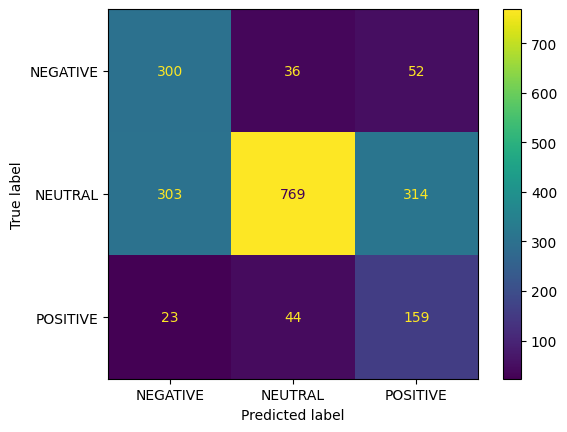

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions_MNB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=MNB.classes_)

disp.plot()

plt.show()

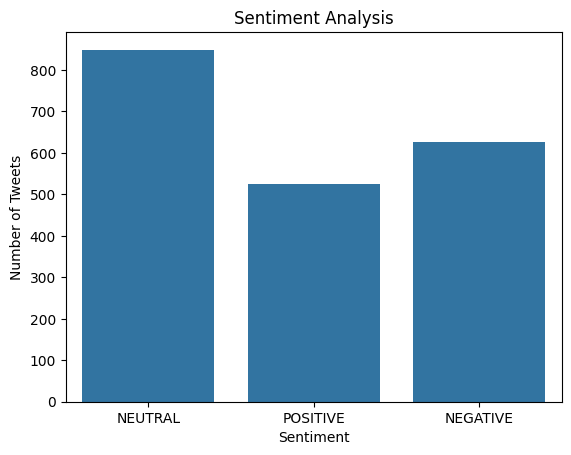

In [ ]:
#create bar graph
import matplotlib.pyplot as plt
import seaborn as sns

# create a barplot
sns.countplot(x='Sentiment', data= test_prediction_MNB)

# set the title
plt.title('Sentiment Analysis')

# set the x and y label
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

# show the plot
plt.show()

In [ ]:
test_prediction_MNB['Sentiment'].value_counts()

Sentiment
NEUTRAL     849
NEGATIVE    626
POSITIVE    525
Name: count, dtype: int64

In [ ]:
df2['Sentiment (Manual)'].value_counts()

Sentiment (Manual)
NEUTRAL     1386
NEGATIVE     388
POSITIVE     226
Name: count, dtype: int64

Codes below is to calculate roc auc score and display graphs.

In [ ]:
n_samples, n_features = X_test_tfidf_vect.shape
n_classes = len(np.unique(y_test))
target_names = ['POSITIVE','NEGATIVE','NEUTRAL']

In [ ]:
y_score = MNB.fit(X_train_tfidf_vect, y_train).predict_proba(X_test_tfidf_vect)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(2000, 3)

In [ ]:
label_binarizer.transform(["POSITIVE"])

array([[0, 0, 1]])

In [ ]:
class_of_interest = "POSITIVE"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

In [ ]:
#First code example for micro-average ROC-AUC
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.80


In [ ]:
#Second code example for micro-average ROC-AUC
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.80


In [ ]:
#First code example for macro-average ROC-AUC
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.85


In [ ]:
#Second code example for macro-average ROC-AUC
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.85


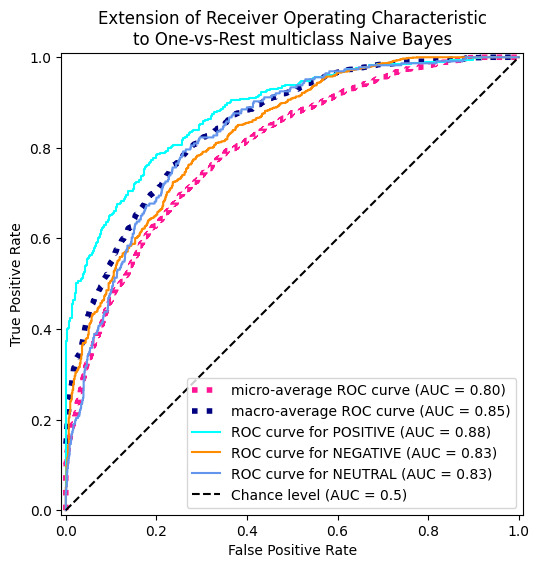

In [ ]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass Naive Bayes",
)